# https://userguide.mdanalysis.org/1.0.0/examples/quickstart.html

In [32]:
# VErify installation

import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

print(mda.Universe(PSF, DCD))
print(mda.__version__)

<Universe with 3341 atoms>
0.20.1


In [33]:
# Load file with only structure (no coordinates and timeseries) PSF

psf = mda.Universe(PSF)
print(psf)
print(hasattr(psf, 'trajectory'))

# Could also do this with your own pdb file:
#structure_only = mda.Universe("my_pdb_file.pdb")

<Universe with 3341 atoms>
False


In [34]:
# Single frame data GRO

gro = mda.Universe(GRO)
print(gro)
print(len(gro.trajectory))

<Universe with 47681 atoms>
1


In [35]:
# This is a simulation where the enzyme adenylate kinase samples a transition from 
# a closed to an open conformation (Beckstein et al., 2009).
# It will be used for rest of tutorial.

u = mda.Universe(PSF, DCD)
print(u)
print(len(u.trajectory))

<Universe with 3341 atoms>
98


In [36]:
# Working with groups of atoms

# the .residues attribute of a Universe returns a ResidueGroup:
print(u.residues)
print()

# Similarily, selecting atoms:
print(u.atoms)
print()

# slicing
last_five = u.atoms[-5:]
print(last_five)
print()

# fancy indexing
print(last_five[[0, 3, -1, 1, 3, 0]])
print()

# atom selection language (https://www.mdanalysis.org/UserGuide/selections)
print(u.select_atoms('resname ASP or resname GLU'))
print()

# boolean and wildcard
u.select_atoms("(resname GLU or resname HS*) and name CA and (resid 1:100)")

## slicing vs selecting

# in slicing, the last index is NOT INCLUDED
print(u.select_atoms('resid 50-52').n_residues)
print(u.residues[50:52].n_residues)

# An AtomGroup created from a selection is sorted and duplicate elements are removed. 
# This is not true for an AtomGroup produced by slicing.
# Thus, slicing can be used when the order of atoms is crucial.

<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, ..., <Residue ILE, 212>, <Residue LEU, 213>, <Residue GLY, 214>]>

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom

In [37]:
# Getting atom information from AtomGroups

print(u.atoms[:20].names)
print(u.atoms[:20].residues)
print(u.atoms[-20:].segments)

# group atoms together by topology attributes.
# around distance selection selects all atoms within distance away from another selection

near_met = u.select_atoms('not resname MET and (around 2 resname MET)')
near_met.groupby(['resnames', 'names'])

['N' 'HT1' 'HT2' 'HT3' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG' 'HG1' 'HG2' 'SD'
 'CE' 'HE1' 'HE2' 'HE3' 'C' 'O' 'N']
<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>]>
<SegmentGroup [<Segment 4AKE>]>


{('ILE', 'C'): <AtomGroup with 2 atoms>,
 ('GLU', 'N'): <AtomGroup with 1 atom>,
 ('GLN', 'C'): <AtomGroup with 1 atom>,
 ('THR', 'N'): <AtomGroup with 1 atom>,
 ('ARG', 'N'): <AtomGroup with 1 atom>,
 ('LEU', 'N'): <AtomGroup with 1 atom>,
 ('ASN', 'O'): <AtomGroup with 1 atom>,
 ('ASP', 'C'): <AtomGroup with 1 atom>,
 ('ASP', 'N'): <AtomGroup with 1 atom>,
 ('LYS', 'N'): <AtomGroup with 1 atom>,
 ('ALA', 'C'): <AtomGroup with 1 atom>,
 ('ALA', 'HN'): <AtomGroup with 2 atoms>}

In [38]:
# AtomGroup positions and methods

# .positions attribute from an AtomGroup: a numpy.ndarray of coordinates, with the shape (n_atoms, 3).

ca = u.select_atoms('resid 1-5 and name CA')
print(ca.positions)
print(ca.positions.shape)

# methods such as center_of_mass, center_of_geometry etc.
# there is an elaborate procedures for guessing for unavailable data
# (https://userguide.mdanalysis.org/1.0.0/formats/guessing.html)

print(ca.center_of_mass())

# Manually creating topology geometries
# NOTE: NOT a topology guessing algorithm but a creation algorithm i.e. .bond requires exactly 2 atoms and so on

# The value returned for an angle is the angle between first and third atom, with the apex at the second.
nhh = u.atoms[:3]
print(nhh.names)
angle_nhh = nhh.angle
print(angle_nhh.value())

# Can order angle using fancy indexing
hnh = u.atoms[[1, 0, 2]]
print(hnh.names)
angle_hnh = hnh.angle
print(angle_hnh.value())

[[11.664622    8.393473   -8.983231  ]
 [11.414839    5.4344215  -6.5134845 ]
 [ 8.959755    5.612923   -3.6132305 ]
 [ 8.290068    3.075991   -0.79665166]
 [ 5.011126    3.7638984   1.130355  ]]
(5, 3)
[ 9.06808195  5.25614133 -3.75524844]
['N' 'HT1' 'HT2']
37.99234750892497
['HT1' 'N' 'HT2']
106.2036465194493


10
Frame:   0, Time:    1 ps, Rgyr: 16.6690 A
Frame:   1, Time:    2 ps, Rgyr: 16.6732 A
Frame:   2, Time:    3 ps, Rgyr: 16.7315 A
Frame:   3, Time:    4 ps, Rgyr: 16.7223 A
Frame:   4, Time:    5 ps, Rgyr: 16.7440 A
Frame:   5, Time:    6 ps, Rgyr: 16.7185 A
Frame:   6, Time:    7 ps, Rgyr: 16.7741 A
Frame:   7, Time:    8 ps, Rgyr: 16.7764 A
Frame:   8, Time:    9 ps, Rgyr: 16.7894 A
Frame:   9, Time:   10 ps, Rgyr: 16.8289 A
Frame:  10, Time:   11 ps, Rgyr: 16.8521 A
Frame:  11, Time:   12 ps, Rgyr: 16.8549 A
Frame:  12, Time:   13 ps, Rgyr: 16.8723 A
Frame:  13, Time:   14 ps, Rgyr: 16.9108 A
Frame:  14, Time:   15 ps, Rgyr: 16.9494 A
Frame:  15, Time:   16 ps, Rgyr: 16.9810 A
Frame:  16, Time:   17 ps, Rgyr: 17.0033 A
Frame:  17, Time:   18 ps, Rgyr: 17.0196 A
Frame:  18, Time:   19 ps, Rgyr: 17.0784 A
Frame:  19, Time:   20 ps, Rgyr: 17.1265 A
0
           Radius of gyration (A)
Time (ps)                        
1.0                     16.669018
2.0                     16.673217

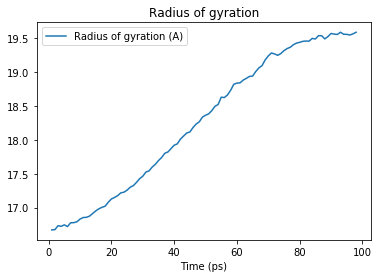

In [39]:
# Working with trajectories

# can set the timestep of the trajectory with the frame index:
print(u.trajectory[10].frame)

# can sample across timesteps
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame: {:3d}, Time: {:4.0f} ps, Rgyr: {:.4f} A".format(ts.frame, time, rgyr))

# After iteration, the trajectory ‘resets’ back to the first frame. 
print(u.trajectory.frame)

# Generally, trajectory analysis first collects frame-wise data in a list.
rgyr = []
time = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(protein.radius_of_gyration())

import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'

print(rgyr_df.head());

%matplotlib inline

rgyr_df.plot(title='Radius of gyration');

# Dynamic selection
# Selections are often defined on static properties that do not change when moving through a trajectory. 
# For queries such as around, the selection should be updated for each time step using a dynamic selection
# the keyword updating=True gives an UpdatingAtomGroup rather than a static AtomGroup.
dynamic = u.select_atoms('around 2 resname ALA', updating=True)
print(type(dynamic))
print(len(dynamic))
u.trajectory.next()
print(len(dynamic))

In [42]:
# Writing out coordinates

# Single frame
ca = u.select_atoms('name CA')
ca.write('calphas.gro')

# Trajectories
# Open a trajectory Writer and specify how many atoms a frame will contain
# Iterate through the trajectory and write coordinates frame-by-frame with Writer.write()
# If you do not use the context manager and the with statement below, need to close the trajectory with .close().

ca = u.select_atoms('name CA')
with mda.Writer('calphas.xtc', ca.n_atoms) as w:
    for ts in u.trajectory:
        w.write(ca)

6.852774844656239
(98, 5)


,Backbone,C-alphas,Protein
Time (ps),,,
1.0,3.689963e-07,4.263638e-08,5.443850e-08
2.0,4.636592e-01,4.235205e-01,6.934167e-01
3.0,6.419340e-01,5.939111e-01,8.748416e-01
4.0,7.743983e-01,7.371346e-01,1.052780e+00
5.0,8.588600e-01,8.279498e-01,1.154986e+00


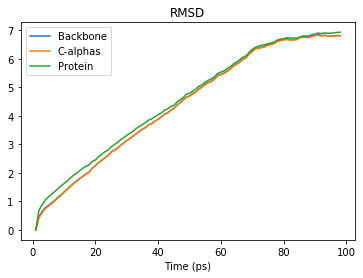

In [48]:
# Analysis

# Most follow a common interface:
# Initialise: with a Universe and other required parameters.
# Run: with .run(). Optional args: start index, stop index, step, toggling verbose. Default: runs whole trajectory.
# Results: stored within the class.
# Often, a function is available to operate on single frames.

# rmsd
from MDAnalysis.analysis import rms # most analysis modules have to be imported from analysis module

bb = u.select_atoms('backbone')
u.trajectory[0] # first frame
first = bb.positions
u.trajectory[-1] #last frame
last = bb.positions
print(rms.rmsd(first, last)) # rmsd() 'function' calculates RMSD between two numpy arrays of coords 
                             # i.e. operates only on 1/2 frames

# RMSD
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone', groupselections=['name CA', 'protein'])
rmsd_analysis.run();
print(rmsd_analysis.rmsd.shape) # (timesteps, {columns: frame number, time, RMSD(backbone,C-alpha,protein)})

import pandas as pd

rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:],
                       columns=['Backbone', 'C-alphas', 'Protein'],
                       index=rmsd_analysis.rmsd[:, 1])
rmsd_df.index.name = 'Time (ps)'
display(rmsd_df.head())

display(rmsd_df.plot(title='RMSD'))

# References

N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. 
MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. 
J. Comput. Chem. 32 (2011), 2319–2327. 
doi:10.1002/jcc.21787

R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, 
S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. 
MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations. 
In S. Benthall and S. Rostrup, editors, 
Proceedings of the 15th Python in Science Conference, pages 98-105, Austin, TX, 2016. SciPy. 
doi:10.25080/Majora-629e541a-00e

# Automatic citations with duecredit
```bash
python -m duecredit my_script.py
duecredit summary --format=bibtex
```